In [20]:
# Google Colab to test SipHash Accelerator
# Author - Ben Welte
# Date - 4/12/2022
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#########################################################################
# RAW ZEDBOARD DATA
#########################################################################

# Size of the messages hashed in bytes
input_sizes = [7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 1048575]

# Hardware hash times in clock cycles
zedboard_hw_24_x1_cycles = [77, 59, 98, 98, 100, 118, 155, 203, 351, 603, 1110, 2132, 4188, 8291, 131161]
zedboard_hw_24_x2_cycles = [101, 101, 120, 122, 120, 139, 173, 245, 371, 623, 1131, 2158, 4205, 8309, 131177]

zedboard_hw_24_x3_cycles = [163, 207, 204, 204, 230, 254, 277, 318, 447, 717, 1220, 2273, 4331, 8487, 132683]
zedboard_hw_24_x4_cycles = [206, 248, 246, 246, 248, 279, 278, 342, 479, 739, 1256, 2299, 4355, 8499, 132898]

zedboard_hw_13_x1_cycles = [78, 134, 133, 134, 132, 151, 191, 262, 388, 640, 1145, 2167, 4221, 8325, 131191]
zedboard_hw_13_x2_cycles = [118, 156, 175, 175, 173, 193, 229, 303, 428, 679, 1186, 2209, 4263, 8364, 132783]

zedboard_hw_13_x3_cycles = [173, 217, 217, 217, 217, 241, 261, 345, 465, 725, 1253, 2283, 4343, 8485, 132725]
zedboard_hw_13_x4_cycles = [181, 225, 247, 242, 242, 265, 307, 365, 485, 745, 1271, 2303, 4383, 8527, 132783]

# Software hash times in clock cycles (optimized w/-O3)
zedboard_sw_24_x1_cycles = [133, 160, 167, 260, 308, 390, 541, 873, 1528, 2823, 5460, 10710, 21167, 42140, 670967]
zedboard_sw_24_x2_cycles = [157, 192, 211, 313, 398, 562, 895, 1550, 2870, 5489, 10717, 21180, 42154, 84077, 1341712]

zedboard_sw_24_x3_cycles = [287, 234, 232, 433, 520, 897, 1663, 3191, 6244, 12355, 24580, 49028, 97955, 195970, 3130215]
zedboard_sw_24_x4_cycles = [324, 278, 298, 526, 682, 1189, 2212, 4245, 8317, 16467, 32764, 65362, 130591, 261066, 4173767]

zedboard_sw_13_x1_cycles = [124, 89, 77, 112, 106, 148, 238, 420, 781, 1504, 2951, 5844, 11632, 23219, 370559]
zedboard_sw_13_x2_cycles = [121, 95, 90, 139, 152, 242, 423, 783, 1507, 2954, 5848, 11638, 23221, 46393, 740951]

zedboard_sw_13_x3_cycles = [215, 194, 171, 272, 329, 541, 964, 1804, 3493, 6867, 13621, 27128, 54156, 108221, 1729220]
zedboard_sw_13_x4_cycles = [254, 216, 222, 371, 432, 716, 1280, 2400, 4650, 9152, 18158, 36171, 72210, 144273, 2305658]



In [22]:
#########################################################################
# RAW ZCU106 DATA
#########################################################################

# Hardware hash times in clock cycles
zcu106_hw_24_x1_cycles = [137, 170, 170, 236, 201, 203, 234, 298, 489, 682, 1197, 2289, 4406, 8686, 136342]
zcu106_hw_24_x2_cycles = [169, 215, 213, 212, 212, 250, 279, 345, 476, 735, 1254, 2319, 4469, 8724, 136391]

zcu106_hw_24_x3_cycles = [193, 255, 255, 255, 254, 288, 388, 387, 516, 744, 1358, 2367, 4508, 8769, 136738]
zcu106_hw_24_x4_cycles = [232, 299, 295, 293, 294, 295, 361, 397, 526, 813, 1393, 2417, 4535, 8784, 136724]

zcu106_hw_13_x1_cycles = [139, 172, 170, 169, 202, 203, 236, 303, 431, 691, 1276, 2312, 4428, 8698, 136346]
zcu106_hw_13_x2_cycles = [149, 217, 212, 212, 213, 246, 282, 344, 474, 734, 1252, 2327, 4464, 8769, 136407]

zcu106_hw_13_x3_cycles = [191, 255, 253, 253, 254, 286, 319, 389, 516, 836, 1284, 2376, 4499, 8764, 136761]
zcu106_hw_13_x4_cycles = [234, 299, 295, 294, 295, 294, 330, 493, 527, 784, 1296, 2388, 4542, 8805, 136657]

# Software hash times in clock cycles (optimized w/-O3)
zcu106_sw_24_x1_cycles = [213, 77, 61, 92, 113, 156, 243, 389, 732, 1419, 2814, 5584, 11137, 22859, 357289]
zcu106_sw_24_x2_cycles = [256, 104, 85, 130, 173, 280, 405, 748, 1434, 2872, 5617, 11089, 22248, 44285, 724692]

zcu106_sw_24_x3_cycles = [198, 155, 142, 203, 264, 411, 625, 1140, 2166, 4223, 8363, 16686, 33420, 66677, 1066740]
zcu106_sw_24_x4_cycles = [215, 174, 167, 240, 323, 514, 813, 1496, 2869, 5677, 11166, 22221, 44226, 88686, 1429977]

zcu106_sw_13_x1_cycles = [169, 49, 53, 85, 95, 120, 147, 274, 455, 867, 1714, 3436, 6763, 13466, 218606]
zcu106_sw_13_x2_cycles = [209, 67, 75, 112, 135, 209, 264, 470, 882, 1705, 3379, 6720, 13881, 27603, 428768]

zcu106_sw_13_x3_cycles = [169, 115, 129, 172, 210, 313, 415, 725, 1340, 2575, 5069, 10079, 20747, 40324, 640422]
zcu106_sw_13_x4_cycles = [182, 132, 149, 199, 255, 374, 538, 944, 1767, 3415, 6730, 13388, 26781, 53705, 851521]

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x1:
-----------------------------------------------------
Zedboard SipHash2-4 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.091		|	 0.053
	 0.254		|	 0.094
	 0.316		|	 0.186
	 0.643		|	 0.242
	 1.270		|	 0.412
	 2.161		|	 0.654
	 3.297		|	 0.945
	 5.039		|	 1.172
	 5.832		|	 1.340
	 6.791		|	 1.451
	 7.379		|	 1.500
	 7.684		|	 1.530
	 7.824		|	 1.548
	 7.904		|	 1.555
	 7.995		|	 1.563

Acceleration vs. software:  5.116 times


Zedboard SipHash2-4 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.052
      15		|  0.145
      31		|  0.181
      63		|  0.367
     127		|  0.726
     255		|  1.235
     511		|  1.884
    1023		|  2.880
    2047		|  3.333
    4095		|  3.881
    8191		|  4.217
   16383		|  4.391
   32767		|  4.471
   65535		|  4.517
 1048575		|  4.568


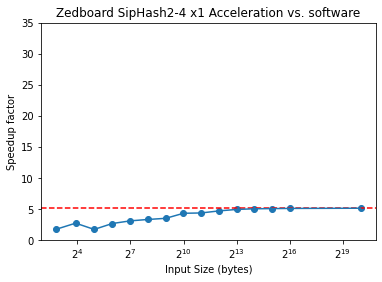

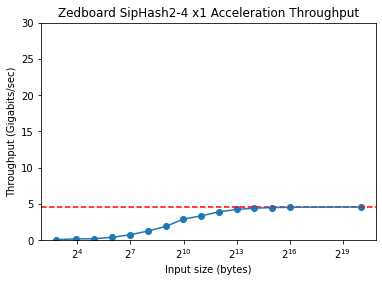

In [23]:
# Method to calculate and graph stuff based on hw & software times
#   Parameters:
#   - hw_cycles: np array of hw clock cycles
#   - sw_cycles: np array of sw clock cycles
#   - input_sizes: np array of input sizes (in bytes)
#   - name_string: string denoting the algorithm (must indicate the algorithm version, i.e. '1-3' or '2-4', and num cores as 'x<n>')
def graph_n_calc(hw_cycles, sw_cycles, input_sizes, name_string):
  if len(hw_cycles) != len(sw_cycles):
    print("Different number of clock cycle measurements for hardware and software! Exiting ...")
    return

  elif not(len(hw_cycles) == len(input_sizes)):
    print("Too many or too few hardware clock cycle measurements! Exiting ...")
    return

  # set clock period (ns) based on name string
  if "Zedboard" in name_string:
    if "1-3" in name_string:
      clk_per = 9
    elif "2-4"in name_string:
      clk_per = 14
    else:
      print("Couldn't determine clock speed from the name you gave the data.  Exiting ...")
      return
  elif "ZCU106" in name_string:
    clk_per = 4.667
  else:
    print("What board is this? Idk")
    return

  # get num cores based on name string
  if "x1" in name_string:
    num_cores = 1
  elif "x2" in name_string:
    num_cores = 2
  elif "x3" in name_string:
    num_cores = 3
  elif "x4" in name_string:
    num_cores = 4

  # Calculate hash times in ns
  hw_times_ns = np.zeros(len(hw_cycles))
  sw_times_ns = np.zeros(len(sw_cycles))
  for i in range(len(hw_times_ns)):
    hw_times_ns[i] = hw_cycles[i] * clk_per
    sw_times_ns[i] = sw_cycles[i] * clk_per

  # Calculate speedup factor:
  speedup = np.zeros(len(hw_cycles))
  for i in range(len(hw_cycles)):
    speedup[i] = sw_cycles[i] / hw_cycles[i]

  print("-----------------------------------------------------")
  print(f"Profile of {name_string}:")
  print("-----------------------------------------------------")

  # Graph acceleration vs. software
  fig = plt.figure()
  plt.title(f"{name_string} Acceleration vs. software")
  plt.ylabel("Speedup factor")
  plt.xlabel("Input Size (bytes)")
  plt.scatter(input_sizes, speedup, label = f"{name_string} Speedup", linestyle = "solid")
  plt.xscale("log", basex = 2)
  if "Zedboard" in name_string:
    plt.ylim(0, 35.0)
  elif "ZCU106" in name_string:
    plt.ylim(0, 12.0)
  plt.axhline(y = speedup[len(speedup) - 1], color = 'r', linestyle = '--')
  plt.plot(input_sizes, speedup)

  # Calculate throughput:
  throughput_hw = np.zeros(len(hw_times_ns))
  throughput_sw = np.zeros(len(sw_times_ns))

  print(f"{name_string} throughput:")
  print("HW Throughput (b/cycle)\t| SW Throughput (b/cycle)")

  for i in range(len(throughput_hw)):
    throughput_hw[i] = input_sizes[i] * num_cores / hw_cycles[i]
    throughput_sw[i] = input_sizes[i] * num_cores / sw_cycles[i]
    print(f"\t{throughput_hw[i] : .3f}\t\t|\t{throughput_sw[i] : .3f}")

  print(f"\nAcceleration vs. software: {speedup[len(speedup) - 1] : .3f} times\n")

  # Calculate throughput in bytes/sec:
  throughput_Gb = np.zeros(len(throughput_hw))

  print(f"\n{name_string}:")
  print("Input size (bytes)\t| Throughput (Gb/sec)")
  for i in range(len(throughput_hw)):
    throughput_Gb[i] = (8.0 * throughput_hw[i]) / clk_per
    print(f"{input_sizes[i] : 8d}\t\t| {throughput_Gb[i] : .3f}")

  fig = plt.figure()
  plt.title(f"{name_string} Acceleration Throughput")
  plt.ylabel("Throughput (Gigabits/sec)")
  plt.xlabel("Input size (bytes)")
  plt.scatter(input_sizes, throughput_Gb, linestyle = "solid")
  plt.xscale("log", basex = 2)
  if "Zedboard" in name_string:
    plt.ylim(0, 30.0)
  elif "ZCU106" in name_string:
    plt.ylim(0, 60.0)
  plt.axhline(y = throughput_Gb[len(throughput_Gb) - 1], color = 'r', linestyle = '--')
  plt.plot(input_sizes, throughput_Gb)

  return throughput_Gb, speedup




zedboard_throughput_24_x1, zedboard_speedup_24_x1 = graph_n_calc(zedboard_hw_24_x1_cycles, zedboard_sw_24_x1_cycles, input_sizes, "Zedboard SipHash2-4 x1")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x2:
-----------------------------------------------------
Zedboard SipHash2-4 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.139		|	 0.089
	 0.297		|	 0.156
	 0.517		|	 0.294
	 1.033		|	 0.403
	 2.117		|	 0.638
	 3.669		|	 0.907
	 5.908		|	 1.142
	 8.351		|	 1.320
	 11.035		|	 1.426
	 13.146		|	 1.492
	 14.485		|	 1.529
	 15.184		|	 1.547
	 15.585		|	 1.555
	 15.774		|	 1.559
	 15.987		|	 1.563

Acceleration vs. software:  10.228 times


Zedboard SipHash2-4 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.079
      15		|  0.170
      31		|  0.295
      63		|  0.590
     127		|  1.210
     255		|  2.097
     511		|  3.376
    1023		|  4.772
    2047		|  6.306
    4095		|  7.512
    8191		|  8.277
   16383		|  8.676
   32767		|  8.906
   65535		|  9.014
 1048575		|  9.136


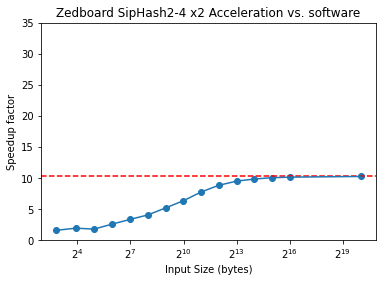

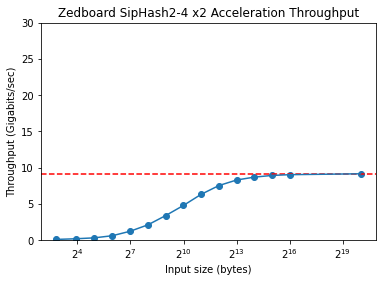

In [24]:
# SipHash2-4 x2
zedboard_throughput_24_x2, zedboard_speedup_24_x2 = graph_n_calc(zedboard_hw_24_x2_cycles, zedboard_sw_24_x2_cycles, input_sizes, "Zedboard SipHash2-4 x2")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x3:
-----------------------------------------------------
Zedboard SipHash2-4 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.129		|	 0.073
	 0.217		|	 0.192
	 0.456		|	 0.401
	 0.926		|	 0.436
	 1.657		|	 0.733
	 3.012		|	 0.853
	 5.534		|	 0.922
	 9.651		|	 0.962
	 13.738		|	 0.984
	 17.134		|	 0.994
	 20.142		|	 1.000
	 21.623		|	 1.002
	 22.697		|	 1.004
	 23.165		|	 1.003
	 23.709		|	 1.005

Acceleration vs. software:  23.592 times


Zedboard SipHash2-4 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.074
      15		|  0.124
      31		|  0.261
      63		|  0.529
     127		|  0.947
     255		|  1.721
     511		|  3.162
    1023		|  5.515
    2047		|  7.850
    4095		|  9.791
    8191		|  11.510
   16383		|  12.356
   32767		|  12.970
   65535		|  13.237
 1048575		|  13.548


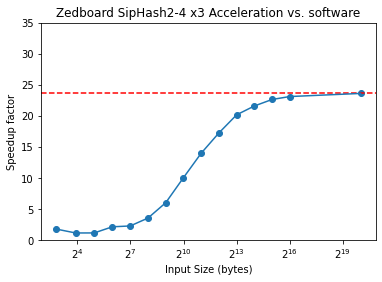

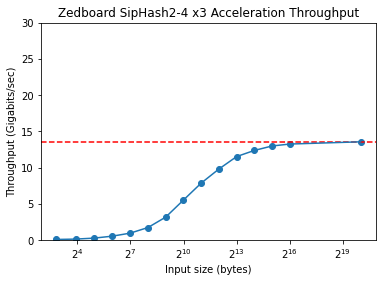

In [25]:
zedboard_throughput_24_x3, zedboard_speedup_24_x3 = graph_n_calc(zedboard_hw_24_x3_cycles, zedboard_sw_24_x3_cycles, input_sizes, "Zedboard SipHash2-4 x3")

-----------------------------------------------------
Profile of Zedboard SipHash2-4 x4:
-----------------------------------------------------
Zedboard SipHash2-4 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.136		|	 0.086
	 0.242		|	 0.216
	 0.504		|	 0.416
	 1.024		|	 0.479
	 2.048		|	 0.745
	 3.656		|	 0.858
	 7.353		|	 0.924
	 11.965		|	 0.964
	 17.094		|	 0.984
	 22.165		|	 0.995
	 26.086		|	 1.000
	 28.505		|	 1.003
	 30.096		|	 1.004
	 30.844		|	 1.004
	 31.560		|	 1.005

Acceleration vs. software:  31.406 times


Zedboard SipHash2-4 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.078
      15		|  0.138
      31		|  0.288
      63		|  0.585
     127		|  1.171
     255		|  2.089
     511		|  4.201
    1023		|  6.837
    2047		|  9.768
    4095		|  12.666
    8191		|  14.906
   16383		|  16.288
   32767		|  17.198
   65535		|  17.625
 1048575		|  18.034


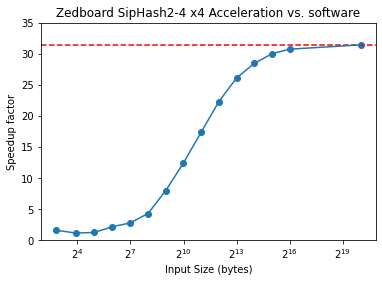

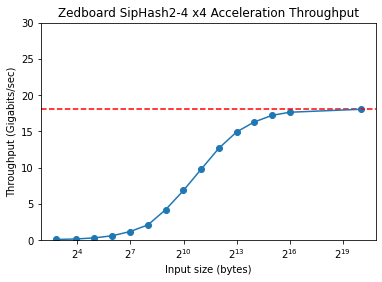

In [26]:
zedboard_throughput_24_x4, zedboard_speedup_24_x4 = graph_n_calc(zedboard_hw_24_x4_cycles, zedboard_sw_24_x4_cycles, input_sizes, "Zedboard SipHash2-4 x4")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x1:
-----------------------------------------------------
Zedboard SipHash1-3 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.090		|	 0.056
	 0.112		|	 0.169
	 0.233		|	 0.403
	 0.470		|	 0.562
	 0.962		|	 1.198
	 1.689		|	 1.723
	 2.675		|	 2.147
	 3.905		|	 2.436
	 5.276		|	 2.621
	 6.398		|	 2.723
	 7.154		|	 2.776
	 7.560		|	 2.803
	 7.763		|	 2.817
	 7.872		|	 2.822
	 7.993		|	 2.830

Acceleration vs. software:  2.825 times


Zedboard SipHash1-3 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.080
      15		|  0.100
      31		|  0.207
      63		|  0.418
     127		|  0.855
     255		|  1.501
     511		|  2.378
    1023		|  3.471
    2047		|  4.690
    4095		|  5.688
    8191		|  6.359
   16383		|  6.720
   32767		|  6.900
   65535		|  6.997
 1048575		|  7.105


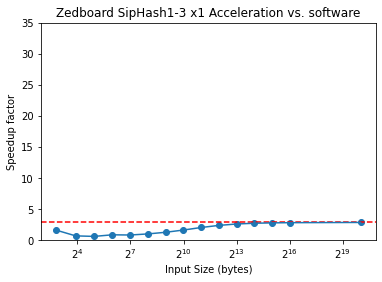

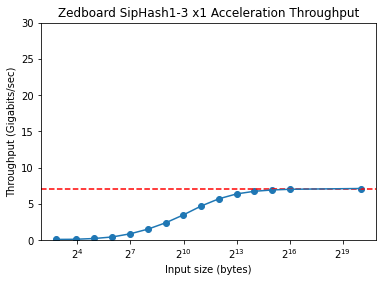

In [27]:
# SipHash1-3 x1:
zedboard_throughput_13_x1, zedboard_speedup_13_x1 = graph_n_calc(zedboard_hw_13_x1_cycles, zedboard_sw_13_x1_cycles, input_sizes, "Zedboard SipHash1-3 x1")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x2:
-----------------------------------------------------
Zedboard SipHash1-3 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.119		|	 0.116
	 0.192		|	 0.316
	 0.354		|	 0.689
	 0.720		|	 0.906
	 1.468		|	 1.671
	 2.642		|	 2.107
	 4.463		|	 2.416
	 6.752		|	 2.613
	 9.565		|	 2.717
	 12.062		|	 2.773
	 13.813		|	 2.801
	 14.833		|	 2.815
	 15.373		|	 2.822
	 15.671		|	 2.825
	 15.794		|	 2.830

Acceleration vs. software:  5.580 times


Zedboard SipHash1-3 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.105
      15		|  0.171
      31		|  0.315
      63		|  0.640
     127		|  1.305
     255		|  2.349
     511		|  3.967
    1023		|  6.002
    2047		|  8.503
    4095		|  10.722
    8191		|  12.278
   16383		|  13.185
   32767		|  13.665
   65535		|  13.930
 1048575		|  14.039


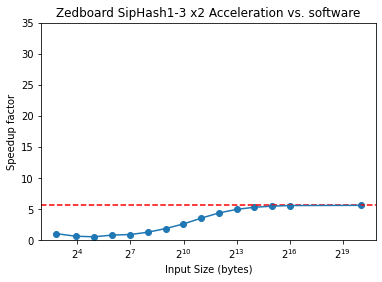

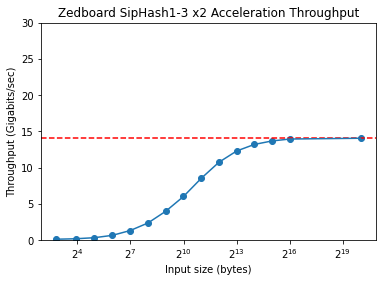

In [28]:
# SipHash1-3 x2:
zedboard_throughput_13_x2, zedboard_speedup_13_x2 = graph_n_calc(zedboard_hw_13_x2_cycles, zedboard_sw_13_x2_cycles, input_sizes, "Zedboard SipHash1-3 x2")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x3:
-----------------------------------------------------
Zedboard SipHash1-3 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.121		|	 0.098
	 0.207		|	 0.232
	 0.429		|	 0.544
	 0.871		|	 0.695
	 1.756		|	 1.158
	 3.174		|	 1.414
	 5.874		|	 1.590
	 8.896		|	 1.701
	 13.206		|	 1.758
	 16.945		|	 1.789
	 19.611		|	 1.804
	 21.528		|	 1.812
	 22.634		|	 1.815
	 23.171		|	 1.817
	 23.701		|	 1.819

Acceleration vs. software:  13.029 times


Zedboard SipHash1-3 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.108
      15		|  0.184
      31		|  0.381
      63		|  0.774
     127		|  1.561
     255		|  2.822
     511		|  5.221
    1023		|  7.907
    2047		|  11.739
    4095		|  15.062
    8191		|  17.432
   16383		|  19.136
   32767		|  20.119
   65535		|  20.596
 1048575		|  21.068


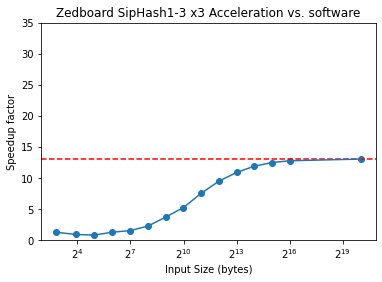

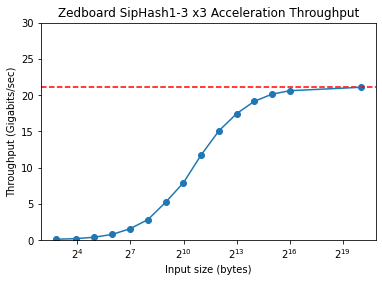

In [29]:
# SipHash1-3 x3:
zedboard_throughput_13_x3, zedboard_speedup_13_x3 = graph_n_calc(zedboard_hw_13_x3_cycles, zedboard_sw_13_x3_cycles, input_sizes, "Zedboard SipHash1-3 x3")

-----------------------------------------------------
Profile of Zedboard SipHash1-3 x4:
-----------------------------------------------------
Zedboard SipHash1-3 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.155		|	 0.110
	 0.267		|	 0.278
	 0.502		|	 0.559
	 1.041		|	 0.679
	 2.099		|	 1.176
	 3.849		|	 1.425
	 6.658		|	 1.597
	 11.211		|	 1.705
	 16.882		|	 1.761
	 21.987		|	 1.790
	 25.778		|	 1.804
	 28.455		|	 1.812
	 29.904		|	 1.815
	 30.742		|	 1.817
	 31.588		|	 1.819

Acceleration vs. software:  17.364 times


Zedboard SipHash1-3 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.138
      15		|  0.237
      31		|  0.446
      63		|  0.926
     127		|  1.866
     255		|  3.421
     511		|  5.918
    1023		|  9.965
    2047		|  15.007
    4095		|  19.544
    8191		|  22.914
   16383		|  25.293
   32767		|  26.581
   65535		|  27.327
 1048575		|  28.078


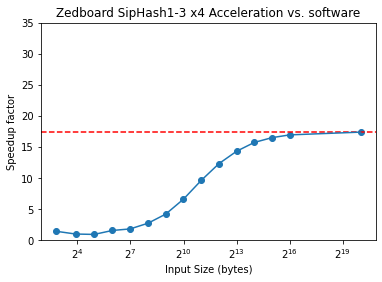

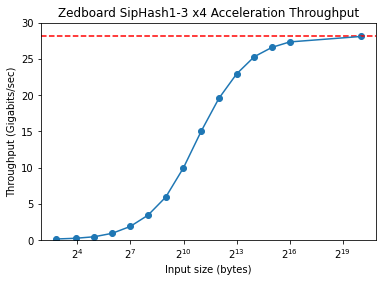

In [30]:
zedboard_throughput_13_x4, zedboard_speedup_13_x4 = graph_n_calc(zedboard_hw_13_x4_cycles, zedboard_sw_13_x4_cycles, input_sizes, "Zedboard SipHash1-3 x4")

[]

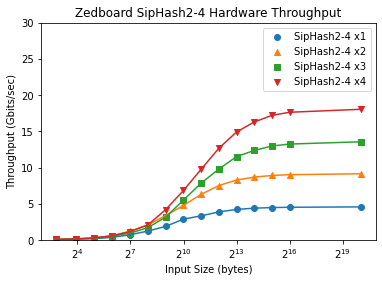

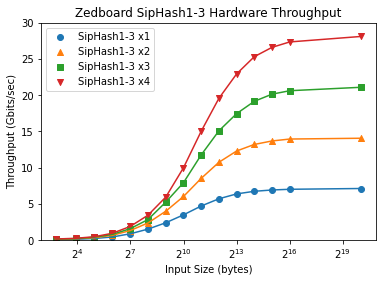

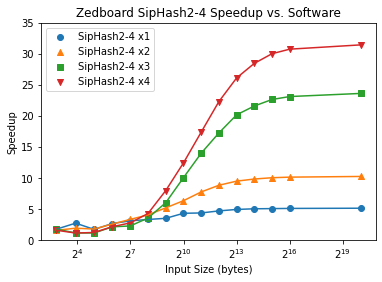

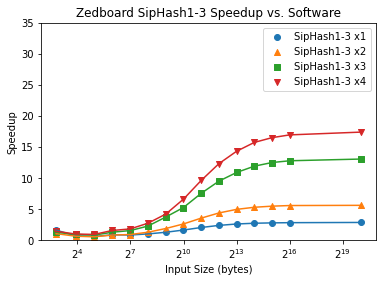

In [42]:
#Graph all data together:

fig = plt.figure()
plt.title("Zedboard SipHash2-4 Hardware Throughput")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_throughput_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_throughput_24_x1)
plt.scatter(input_sizes, zedboard_throughput_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_throughput_24_x2)
plt.scatter(input_sizes, zedboard_throughput_24_x3, label = 'SipHash2-4 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_throughput_24_x3)
plt.scatter(input_sizes, zedboard_throughput_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_throughput_24_x4)
plt.ylim(0, 30)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("Zedboard SipHash1-3 Hardware Throughput")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_throughput_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_throughput_13_x1)
plt.scatter(input_sizes, zedboard_throughput_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_throughput_13_x2)
plt.scatter(input_sizes, zedboard_throughput_13_x3, label = 'SipHash1-3 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_throughput_13_x3)
plt.scatter(input_sizes, zedboard_throughput_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_throughput_13_x4)
plt.ylim(0, 30)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

# Speedup graphs (TODO)

fig = plt.figure()
plt.title("Zedboard SipHash2-4 Speedup vs. Software")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_speedup_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_speedup_24_x1)
plt.scatter(input_sizes, zedboard_speedup_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_speedup_24_x2)
plt.scatter(input_sizes, zedboard_speedup_24_x3, label = 'SipHash2-4 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_speedup_24_x3)
plt.scatter(input_sizes, zedboard_speedup_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_speedup_24_x4)
plt.ylim(0, 35)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("Zedboard SipHash1-3 Speedup vs. Software")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zedboard_speedup_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zedboard_speedup_13_x1)
plt.scatter(input_sizes, zedboard_speedup_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zedboard_speedup_13_x2)
plt.scatter(input_sizes, zedboard_speedup_13_x3, label = 'SipHash1-3 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zedboard_speedup_13_x3)
plt.scatter(input_sizes, zedboard_speedup_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zedboard_speedup_13_x4)
plt.ylim(0, 35)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

ZCU 106

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x1:
-----------------------------------------------------
ZCU106 SipHash2-4 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.051		|	 0.033
	 0.088		|	 0.195
	 0.182		|	 0.508
	 0.267		|	 0.685
	 0.632		|	 1.124
	 1.256		|	 1.635
	 2.184		|	 2.103
	 3.433		|	 2.630
	 4.186		|	 2.796
	 6.004		|	 2.886
	 6.843		|	 2.911
	 7.157		|	 2.934
	 7.437		|	 2.942
	 7.545		|	 2.867
	 7.691		|	 2.935

Acceleration vs. software:  2.621 times


ZCU106 SipHash2-4 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.088
      15		|  0.151
      31		|  0.313
      63		|  0.458
     127		|  1.083
     255		|  2.153
     511		|  3.743
    1023		|  5.885
    2047		|  7.176
    4095		|  10.293
    8191		|  11.730
   16383		|  12.269
   32767		|  12.748
   65535		|  12.933
 1048575		|  13.183


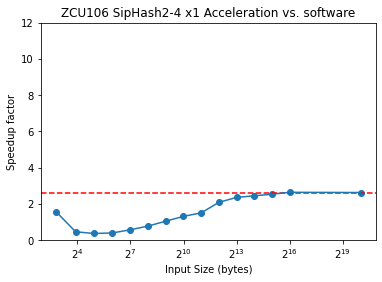

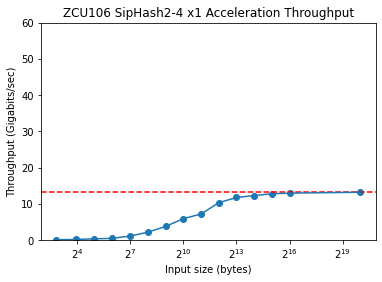

In [32]:
zcu106_throughput_24_x1, zcu106_speedup_24_x1 = graph_n_calc(zcu106_hw_24_x1_cycles, zcu106_sw_24_x1_cycles, input_sizes, "ZCU106 SipHash2-4 x1")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x2:
-----------------------------------------------------
ZCU106 SipHash2-4 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.083		|	 0.055
	 0.140		|	 0.288
	 0.291		|	 0.729
	 0.594		|	 0.969
	 1.198		|	 1.468
	 2.040		|	 1.821
	 3.663		|	 2.523
	 5.930		|	 2.735
	 8.601		|	 2.855
	 11.143		|	 2.852
	 13.064		|	 2.917
	 14.129		|	 2.955
	 14.664		|	 2.946
	 15.024		|	 2.960
	 15.376		|	 2.894

Acceleration vs. software:  5.313 times


ZCU106 SipHash2-4 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.142
      15		|  0.239
      31		|  0.499
      63		|  1.019
     127		|  2.054
     255		|  3.497
     511		|  6.279
    1023		|  10.166
    2047		|  14.743
    4095		|  19.101
    8191		|  22.393
   16383		|  24.220
   32767		|  25.137
   65535		|  25.754
 1048575		|  26.357


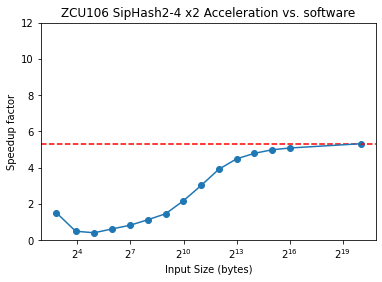

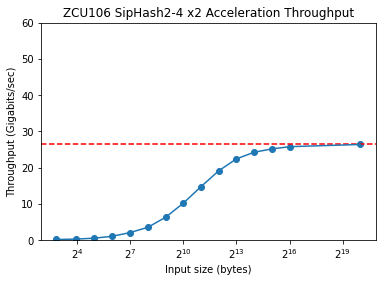

In [33]:
zcu106_throughput_24_x2, zcu106_speedup_24_x2 = graph_n_calc(zcu106_hw_24_x2_cycles, zcu106_sw_24_x2_cycles, input_sizes, "ZCU106 SipHash2-4 x2")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x3:
-----------------------------------------------------
ZCU106 SipHash2-4 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.109		|	 0.106
	 0.176		|	 0.290
	 0.365		|	 0.655
	 0.741		|	 0.931
	 1.500		|	 1.443
	 2.656		|	 1.861
	 3.951		|	 2.453
	 7.930		|	 2.692
	 11.901		|	 2.835
	 16.512		|	 2.909
	 18.095		|	 2.938
	 20.764		|	 2.946
	 21.806		|	 2.941
	 22.420		|	 2.949
	 23.005		|	 2.949

Acceleration vs. software:  7.801 times


ZCU106 SipHash2-4 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.187
      15		|  0.302
      31		|  0.625
      63		|  1.270
     127		|  2.571
     255		|  4.553
     511		|  6.773
    1023		|  13.594
    2047		|  20.401
    4095		|  28.304
    8191		|  31.018
   16383		|  35.593
   32767		|  37.379
   65535		|  38.432
 1048575		|  39.435


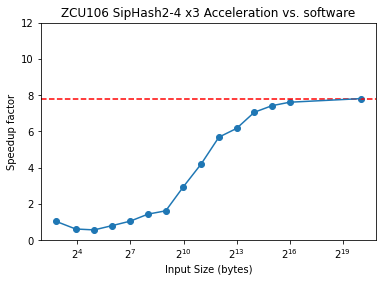

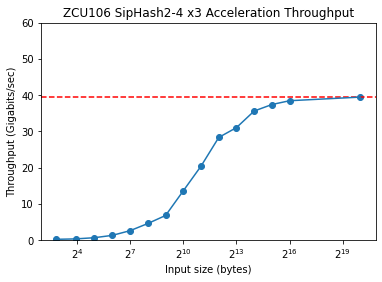

In [35]:
zcu106_throughput_24_x3, zcu106_speedup_24_x3 = graph_n_calc(zcu106_hw_24_x3_cycles, zcu106_sw_24_x3_cycles, input_sizes, "ZCU106 SipHash2-4 x3")

-----------------------------------------------------
Profile of ZCU106 SipHash2-4 x4:
-----------------------------------------------------
ZCU106 SipHash2-4 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.121		|	 0.130
	 0.201		|	 0.345
	 0.420		|	 0.743
	 0.860		|	 1.050
	 1.728		|	 1.573
	 3.458		|	 1.984
	 5.662		|	 2.514
	 10.307		|	 2.735
	 15.567		|	 2.854
	 20.148		|	 2.885
	 23.520		|	 2.934
	 27.113		|	 2.949
	 28.901		|	 2.964
	 29.843		|	 2.956
	 30.677		|	 2.933

Acceleration vs. software:  10.459 times


ZCU106 SipHash2-4 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.207
      15		|  0.344
      31		|  0.721
      63		|  1.474
     127		|  2.962
     255		|  5.927
     511		|  9.706
    1023		|  17.668
    2047		|  26.684
    4095		|  34.536
    8191		|  40.318
   16383		|  46.476
   32767		|  49.542
   65535		|  51.156
 1048575		|  52.586


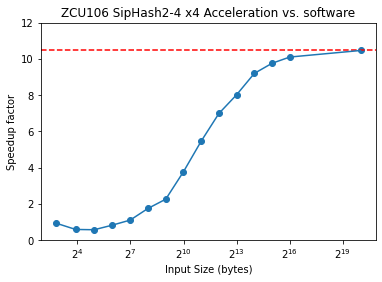

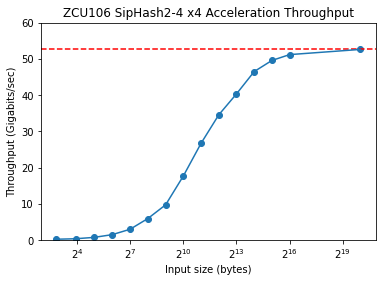

In [36]:
zcu106_throughput_24_x4, zcu106_speedup_24_x4 = graph_n_calc(zcu106_hw_24_x4_cycles, zcu106_sw_24_x4_cycles, input_sizes, "ZCU106 SipHash2-4 x4")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x1:
-----------------------------------------------------
ZCU106 SipHash1-3 x1 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.050		|	 0.041
	 0.087		|	 0.306
	 0.182		|	 0.585
	 0.373		|	 0.741
	 0.629		|	 1.337
	 1.256		|	 2.125
	 2.165		|	 3.476
	 3.376		|	 3.734
	 4.749		|	 4.499
	 5.926		|	 4.723
	 6.419		|	 4.779
	 7.086		|	 4.768
	 7.400		|	 4.845
	 7.534		|	 4.867
	 7.691		|	 4.797

Acceleration vs. software:  1.603 times


ZCU106 SipHash1-3 x1:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.086
      15		|  0.149
      31		|  0.313
      63		|  0.639
     127		|  1.078
     255		|  2.153
     511		|  3.712
    1023		|  5.787
    2047		|  8.141
    4095		|  10.158
    8191		|  11.004
   16383		|  12.147
   32767		|  12.685
   65535		|  12.915
 1048575		|  13.183


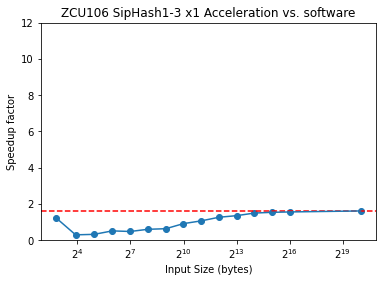

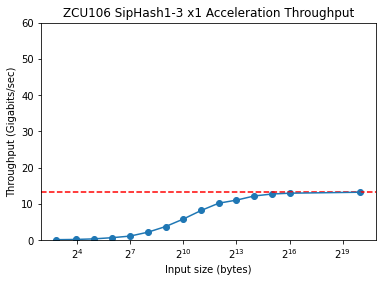

In [37]:
zcu106_throughput_13_x1, zcu106_speedup_13_x1 = graph_n_calc(zcu106_hw_13_x1_cycles, zcu106_sw_13_x1_cycles, input_sizes, "ZCU106 SipHash1-3 x1")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x2:
-----------------------------------------------------
ZCU106 SipHash1-3 x2 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.094		|	 0.067
	 0.138		|	 0.448
	 0.292		|	 0.827
	 0.594		|	 1.125
	 1.192		|	 1.881
	 2.073		|	 2.440
	 3.624		|	 3.871
	 5.948		|	 4.353
	 8.637		|	 4.642
	 11.158		|	 4.804
	 13.085		|	 4.848
	 14.081		|	 4.876
	 14.681		|	 4.721
	 14.947		|	 4.748
	 15.374		|	 4.891

Acceleration vs. software:  3.143 times


ZCU106 SipHash1-3 x2:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.161
      15		|  0.237
      31		|  0.501
      63		|  1.019
     127		|  2.044
     255		|  3.554
     511		|  6.212
    1023		|  10.195
    2047		|  14.805
    4095		|  19.127
    8191		|  22.429
   16383		|  24.137
   32767		|  25.165
   65535		|  25.622
 1048575		|  26.354


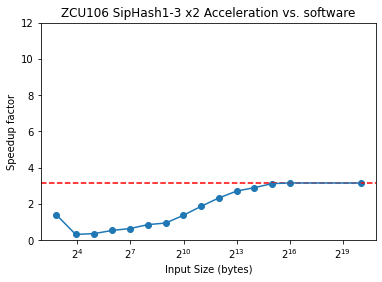

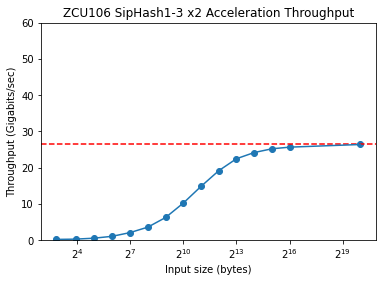

In [38]:
zcu106_throughput_13_x2, zcu106_speedup_13_x2 = graph_n_calc(zcu106_hw_13_x2_cycles, zcu106_sw_13_x2_cycles, input_sizes, "ZCU106 SipHash1-3 x2")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x3:
-----------------------------------------------------
ZCU106 SipHash1-3 x3 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.110		|	 0.124
	 0.176		|	 0.391
	 0.368		|	 0.721
	 0.747		|	 1.099
	 1.500		|	 1.814
	 2.675		|	 2.444
	 4.806		|	 3.694
	 7.889		|	 4.233
	 11.901		|	 4.583
	 14.695		|	 4.771
	 19.138		|	 4.848
	 20.686		|	 4.876
	 21.850		|	 4.738
	 22.433		|	 4.876
	 23.002		|	 4.912

Acceleration vs. software:  4.683 times


ZCU106 SipHash1-3 x3:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.188
      15		|  0.302
      31		|  0.630
      63		|  1.281
     127		|  2.571
     255		|  4.585
     511		|  8.238
    1023		|  13.524
    2047		|  20.401
    4095		|  25.190
    8191		|  32.805
   16383		|  35.459
   32767		|  37.454
   65535		|  38.454
 1048575		|  39.429


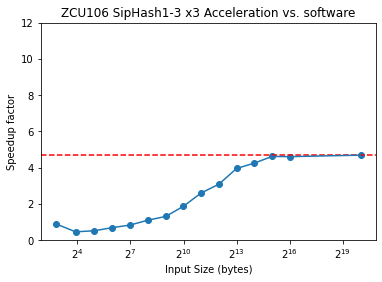

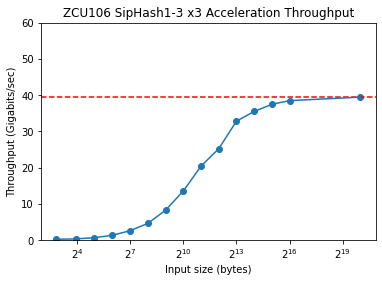

In [39]:
zcu106_throughput_13_x3, zcu106_speedup_13_x3 = graph_n_calc(zcu106_hw_13_x3_cycles, zcu106_sw_13_x3_cycles, input_sizes, "ZCU106 SipHash1-3 x3")

-----------------------------------------------------
Profile of ZCU106 SipHash1-3 x4:
-----------------------------------------------------
ZCU106 SipHash1-3 x4 throughput:
HW Throughput (b/cycle)	| SW Throughput (b/cycle)
	 0.120		|	 0.154
	 0.201		|	 0.455
	 0.420		|	 0.832
	 0.857		|	 1.266
	 1.722		|	 1.992
	 3.469		|	 2.727
	 6.194		|	 3.799
	 8.300		|	 4.335
	 15.537		|	 4.634
	 20.893		|	 4.796
	 25.281		|	 4.868
	 27.442		|	 4.895
	 28.857		|	 4.894
	 29.772		|	 4.881
	 30.692		|	 4.926

Acceleration vs. software:  6.231 times


ZCU106 SipHash1-3 x4:
Input size (bytes)	| Throughput (Gb/sec)
       7		|  0.205
      15		|  0.344
      31		|  0.721
      63		|  1.469
     127		|  2.952
     255		|  5.947
     511		|  10.617
    1023		|  14.228
    2047		|  26.633
    4095		|  35.814
    8191		|  43.336
   16383		|  47.040
   32767		|  49.465
   65535		|  51.034
 1048575		|  52.611


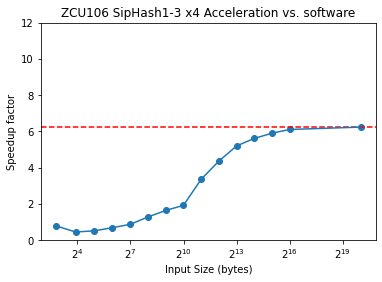

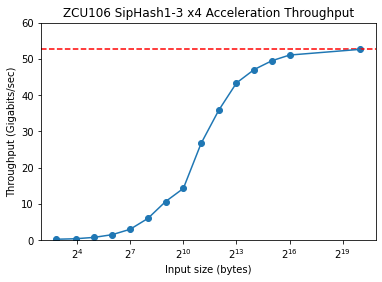

In [40]:
zcu106_throughput_13_x4, zcu106_speedup_13_x4 = graph_n_calc(zcu106_hw_13_x4_cycles, zcu106_sw_13_x4_cycles, input_sizes, "ZCU106 SipHash1-3 x4")

[]

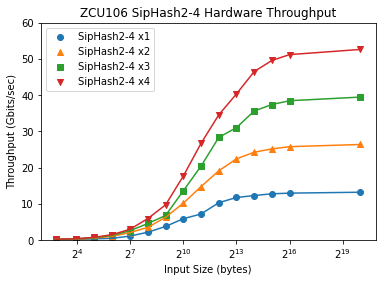

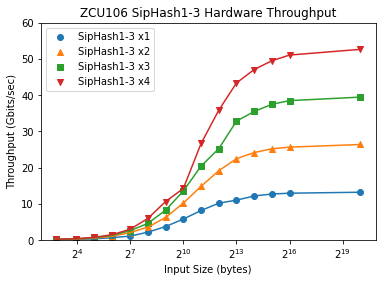

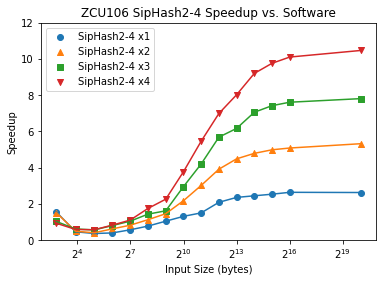

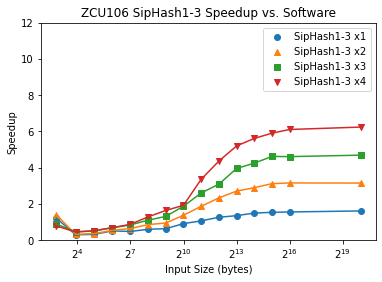

In [43]:
#Graph all data together:

fig = plt.figure()
plt.title("ZCU106 SipHash2-4 Hardware Throughput")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_throughput_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_throughput_24_x1)
plt.scatter(input_sizes, zcu106_throughput_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_throughput_24_x2)
plt.scatter(input_sizes, zcu106_throughput_24_x3, label = 'SipHash2-4 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_throughput_24_x3)
plt.scatter(input_sizes, zcu106_throughput_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_throughput_24_x4)
plt.ylim(0, 60)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("ZCU106 SipHash1-3 Hardware Throughput")
plt.ylabel("Throughput (Gbits/sec)")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_throughput_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_throughput_13_x1)
plt.scatter(input_sizes, zcu106_throughput_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_throughput_13_x2)
plt.scatter(input_sizes, zcu106_throughput_13_x3, label = 'SipHash1-3 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_throughput_13_x3)
plt.scatter(input_sizes, zcu106_throughput_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_throughput_13_x4)
plt.ylim(0, 60)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

# Speedup graphs

fig = plt.figure()
plt.title("ZCU106 SipHash2-4 Speedup vs. Software")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_speedup_24_x1, label = 'SipHash2-4 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_speedup_24_x1)
plt.scatter(input_sizes, zcu106_speedup_24_x2, label = 'SipHash2-4 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_speedup_24_x2)
plt.scatter(input_sizes, zcu106_speedup_24_x3, label = 'SipHash2-4 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_speedup_24_x3)
plt.scatter(input_sizes, zcu106_speedup_24_x4, label = 'SipHash2-4 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_speedup_24_x4)
plt.ylim(0, 12)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()

fig = plt.figure()
plt.title("ZCU106 SipHash1-3 Speedup vs. Software")
plt.ylabel("Speedup")
plt.xlabel("Input Size (bytes)")
#ax1 = fig.add_subplot(111)
plt.scatter(input_sizes, zcu106_speedup_13_x1, label = 'SipHash1-3 x1', linestyle = 'solid')
plt.plot(input_sizes, zcu106_speedup_13_x1)
plt.scatter(input_sizes, zcu106_speedup_13_x2, label = 'SipHash1-3 x2', linestyle = 'solid', marker = "^")
plt.plot(input_sizes, zcu106_speedup_13_x2)
plt.scatter(input_sizes, zcu106_speedup_13_x3, label = 'SipHash1-3 x3', linestyle = 'solid', marker = "s")
plt.plot(input_sizes, zcu106_speedup_13_x3)
plt.scatter(input_sizes, zcu106_speedup_13_x4, label = 'SipHash1-3 x4', linestyle = 'solid', marker = "v")
plt.plot(input_sizes, zcu106_speedup_13_x4)
plt.ylim(0, 12)
plt.legend()
plt.xscale("log", basex = 2)
plt.plot()